# Loading Data via Generators

## Creating Generators

In [6]:
from generators import createGenerators
from keras.preprocessing.image import ImageDataGenerator

# define file paths to relevant data
trainingDataPath = "../behavioral_cloning_data/"
csvFilePath = trainingDataPath + "driving_log.csv"
imagesPath = trainingDataPath + "IMG/"

In [20]:
import numpy as np
from helper import plotImages

# create closure to help with debugging and visualizations
def generatorClosure(csvFilePath, imagesPath):
    def inner_func(data_gen_pp, count=3, title=""):
        # create training set and validation set data generators
        train_generator, validation_generator, t_len, v_len = createGenerators(csvFilePath=csvFilePath, 
                                                                             imagesPath=imagesPath, 
                                                                             data_gen_pp=data_gen_pp,
                                                                             subsegment=count)
        
        generated_images = []
        for i in range(count):
            data = next(train_generator)
            # print(np.array(data[0])[0].shape)
            generated_images.append(np.array(data[0])[0].astype('uint8'))
            
        plotImages(images=generated_images, titles=[title for i in range(count)], columns=3)
                                    
    return inner_func

# use the closure that was just defined
plotGenerator = generatorClosure(csvFilePath, imagesPath)

## Preprocessing Visualizations

In the next several cells, we will be visualizing what effects different preprocessing methods have on the input images

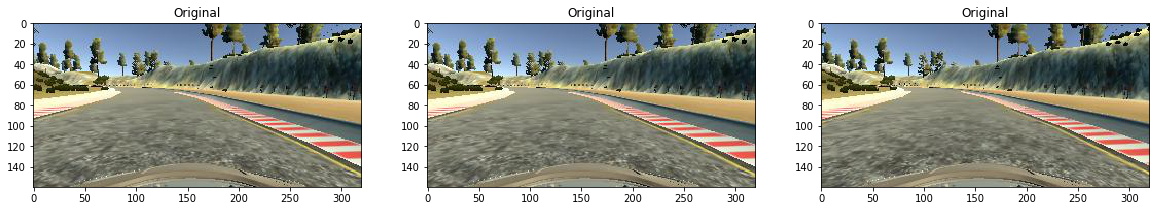

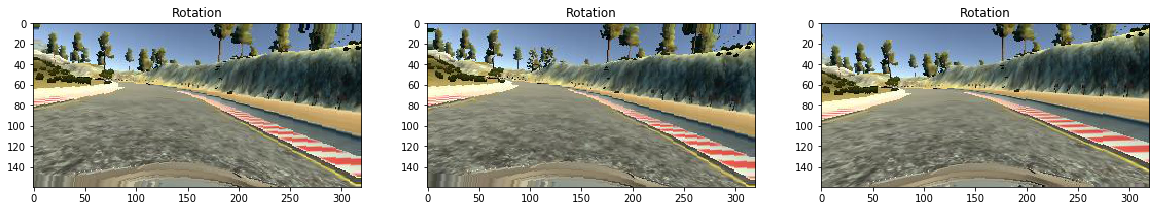

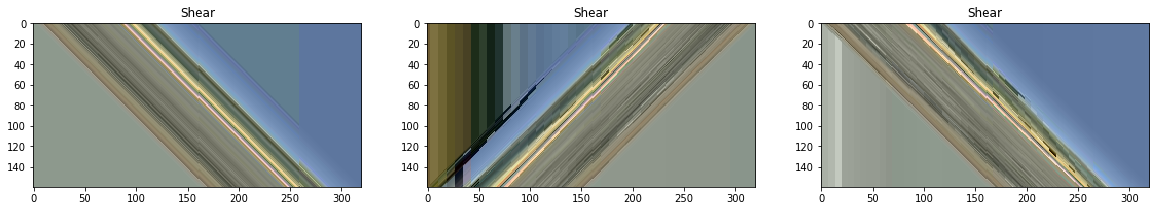

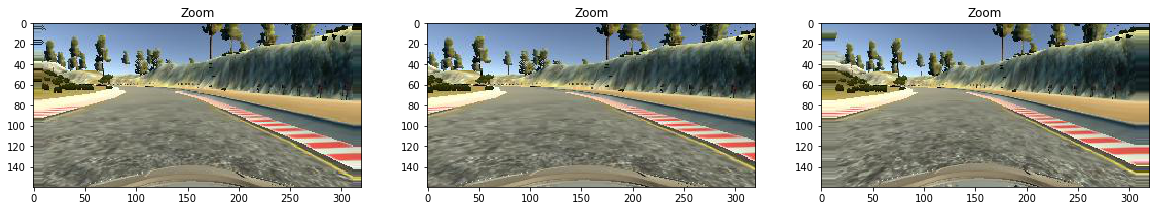

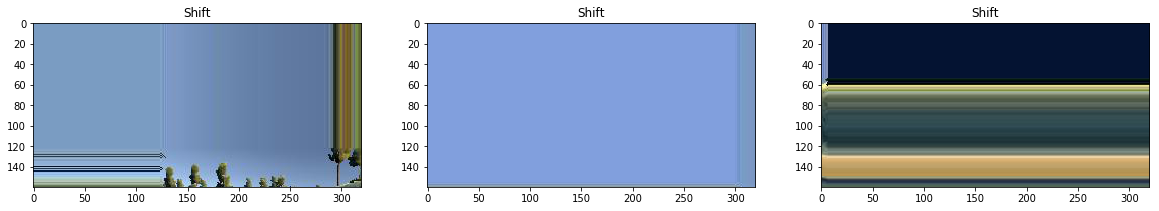

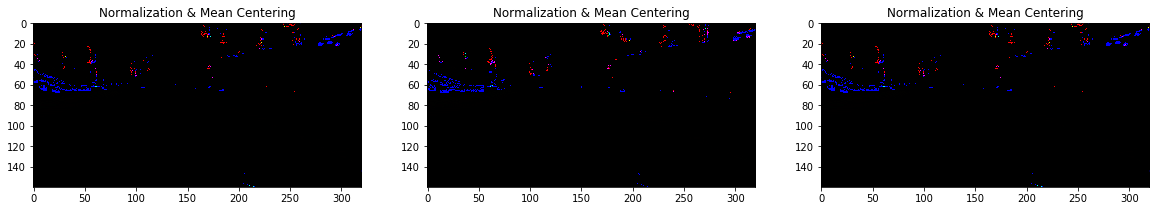

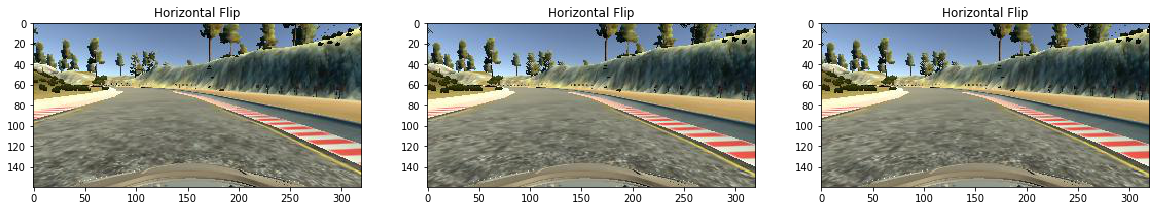

In [24]:
plotGenerator(ImageDataGenerator(),                 title="Original")
plotGenerator(ImageDataGenerator(rotation_range=5), title="Rotation")
plotGenerator(ImageDataGenerator(shear_range=2),    title="Shear")
plotGenerator(ImageDataGenerator(zoom_range=0.1),   title="Zoom")
plotGenerator(ImageDataGenerator(width_shift_range=1, height_shift_range=1), title="Shift")
plotGenerator(ImageDataGenerator(preprocessing_function=lambda x: x/127.5 - 1.), title="Normalization & Mean Centering")
plotGenerator(ImageDataGenerator(horizontal_flip=True), title="Horizontal Flip")